# Web-scraping the books' data from the internet, cleaning it up, and applying it to gain some insights and practical ideas (used the referral code for web-scraping)

In [104]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url='https://books.toscrape.com/catalogue/page-1.html'

In [3]:
response= requests.get(url)

In [5]:
response = response.content
response

b'\n\n<!DOCTYPE html>\n<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->\n<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->\n<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->\n<!--[if gt IE 8]><!--> <html lang="en-us" class="no-js"> <!--<![endif]-->\n    <head>\n        <title>\n    All products | Books to Scrape - Sandbox\n</title>\n\n        <meta http-equiv="content-type" content="text/html; charset=UTF-8" />\n        <meta name="created" content="24th Jun 2016 09:30" />\n        <meta name="description" content="" />\n        <meta name="viewport" content="width=device-width" />\n        <meta name="robots" content="NOARCHIVE,NOCACHE" />\n\n        <!-- Le HTML5 shim, for IE6-8 support of HTML elements -->\n        <!--[if lt IE 9]>\n        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>\n        <![endif]-->\n\n        \n            <link rel="shortcut icon"

In [6]:
soup= BeautifulSoup(response, 'html.parser')

In [7]:
soup


<!DOCTYPE html>

<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-us"> <!--<![endif]-->
<head>
<title>
    All products | Books to Scrape - Sandbox
</title>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="24th Jun 2016 09:30" name="created"/>
<meta content="" name="description"/>
<meta content="width=device-width" name="viewport"/>
<meta content="NOARCHIVE,NOCACHE" name="robots"/>
<!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
<!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
<link href="../static/oscar/favicon.ico" rel="shortcut icon"/>
<link href="../static/oscar/css/styles.css" rel="stylesheet" type="text/css"/>
<link 

In [8]:
ol = soup.find('ol')

In [9]:
articles= ol.find_all('article', class_='product_pod')

In [10]:
articles

[<article class="product_pod">
 <div class="image_container">
 <a href="a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="../media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
 </div>
 <p class="star-rating Three">
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 </p>
 <h3><a href="a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
 <div class="product_price">
 <p class="price_color">£51.77</p>
 <p class="instock availability">
 <i class="icon-ok"></i>
     
         In stock
     
 </p>
 <form>
 <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
 </form>
 </div>
 </article>,
 <article class="product_pod">
 <div class="image_container">
 <a href="tipping-the-velvet_999/index.html"><img alt="Tipping the Velvet" class="thumbnail" src="../media/cache

In [18]:
for article in articles:
    image= article.find('img')
    title = image.attrs['alt']
    print(title)

A Light in the Attic
Tipping the Velvet
Soumission
Sharp Objects
Sapiens: A Brief History of Humankind
The Requiem Red
The Dirty Little Secrets of Getting Your Dream Job
The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull
The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics
The Black Maria
Starving Hearts (Triangular Trade Trilogy, #1)
Shakespeare's Sonnets
Set Me Free
Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)
Rip it Up and Start Again
Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991
Olio
Mesaerion: The Best Science Fiction Stories 1800-1849
Libertarianism for Beginners
It's Only the Himalayas


In [20]:
for article in articles:
    stars = article.find('p')
    stars= stars['class'][1] # 1 is the index for just retrieving the rating number
    print(stars)

Three
One
One
Four
Five
One
Four
Three
Four
One
Two
Four
Five
Five
Five
Three
One
One
Two
Two


In [29]:
for article in articles:
    price = article.find('p', class_='price_color').text
    price = float(price[1:])
    print(price)
    # price = price[1:]    => code to remove the currency ahead of it which makes the number still a string 
    # price= float(price[1:]) => to convert the string to int or float so that we can use min max,etc

51.77
53.74
50.1
47.82
54.23
22.65
33.34
17.93
22.6
52.15
13.99
20.66
17.46
52.29
35.02
57.25
23.88
37.59
51.33
45.17


In [62]:
for article in articles:
    stock = article.find('p')
    stock= article.find('p', class_='instock availability').text
    stock = stock[15:-6]
    print(stock)

In stock
In stock
In stock
In stock
In stock
In stock
In stock
In stock
In stock
In stock
In stock
In stock
In stock
In stock
In stock
In stock
In stock
In stock
In stock
In stock


In [30]:
type(price)

float

In [63]:
# lets put all of these in one variable
books=[]
for article in articles:
    image= article.find('img')
    title = image.attrs['alt']
    stars = article.find('p')
    stars= stars['class'][1]
    price = article.find('p', class_='price_color').text
    price = float(price[1:])
    stock = article.find('p')
    stock= article.find('p', class_='instock availability').text
    stock = stock[15:-6]
    books.append([title,price,stars,stock])

print(books)

[['Frankenstein', 38.0, 'Two', 'In stock'], ['Forever Rockers (The Rocker #12)', 28.8, 'Three', 'In stock'], ['Fighting Fate (Fighting #6)', 39.24, 'Three', 'In stock'], ['Emma', 32.93, 'Two', 'In stock'], ['Eat, Pray, Love', 51.32, 'Three', 'In stock'], ['Deep Under (Walker Security #1)', 47.09, 'Five', 'In stock'], ["Choosing Our Religion: The Spiritual Lives of America's Nones", 28.42, 'Four', 'In stock'], ['Charlie and the Chocolate Factory (Charlie Bucket #1)', 22.85, 'Three', 'In stock'], ["Charity's Cross (Charles Towne Belles #4)", 41.24, 'One', 'In stock'], ['Bright Lines', 39.07, 'Five', 'In stock'], ["Bridget Jones's Diary (Bridget Jones #1)", 29.82, 'One', 'In stock'], ['Bounty (Colorado Mountain #7)', 37.26, 'Four', 'In stock'], ['Blood Defense (Samantha Brinkman #1)', 20.3, 'Three', 'In stock'], ['Bleach, Vol. 1: Strawberry and the Soul Reapers (Bleach #1)', 34.65, 'Five', 'In stock'], ['Beyond Good and Evil', 43.38, 'One', 'In stock'], ["Alice in Wonderland (Alice's Adve

In [65]:
books=[]
for i in range(1,51):
    url=f"https://books.toscrape.com/catalogue/page-{i}.html"
    response = requests.get(url)
    response = response.content
    soup= BeautifulSoup(response, 'html.parser')
    ol = soup.find('ol')
    articles= ol.find_all('article', class_='product_pod')

    for article in articles:
        image= article.find('img')
        title = image.attrs['alt']
        stars = article.find('p')
        stars= stars['class'][1]
        price = article.find('p', class_='price_color').text
        price = float(price[1:])
        stock = article.find('p')
        stock= article.find('p', class_='instock availability').text
        stock = stock[15:-6]
        books.append([title,price,stars,stock])

In [66]:
df= pd.DataFrame(books, columns=['Title','Price','Ratings','Availability'])

In [67]:
df

,Title,Price,Ratings,Availability
0,A Light in the Attic,51.77,Three,In stock
1,Tipping the Velvet,53.74,One,In stock
2,Soumission,50.10,One,In stock
3,Sharp Objects,47.82,Four,In stock
4,Sapiens: A Brief History of Humankind,54.23,Five,In stock
...,...,...,...,...
995,Alice in Wonderland (Alice's Adventures in Won...,55.53,One,In stock
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",57.06,Four,In stock
997,A Spy's Devotion (The Regency Spies of London #1),16.97,Five,In stock
998,1st to Die (Women's Murder Club #1),53.98,One,In stock


In [68]:
df.to_csv('C:/py/books_web_scraping.csv')

In [69]:
# Data in Python
path='C:/py/'
data= pd.read_csv(path+'books_web_scraping.csv')

In [70]:
data.head()

,Unnamed: 0,Title,Price,Ratings,Availability
0,0,A Light in the Attic,51.77,Three,In stock
1,1,Tipping the Velvet,53.74,One,In stock
2,2,Soumission,50.10,One,In stock
3,3,Sharp Objects,47.82,Four,In stock
4,4,Sapiens: A Brief History of Humankind,54.23,Five,In stock


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1000 non-null   int64  
 1   Title         1000 non-null   object 
 2   Price         1000 non-null   float64
 3   Ratings       1000 non-null   object 
 4   Availability  1000 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 39.2+ KB


In [72]:
data.shape

(1000, 5)

In [73]:
data.columns

Index(['Unnamed: 0', 'Title', 'Price', 'Ratings', 'Availability'], dtype='object')

In [75]:
data.drop('Unnamed: 0', inplace=True, axis=1)

In [76]:
data.head(5)

,Title,Price,Ratings,Availability
0,A Light in the Attic,51.77,Three,In stock
1,Tipping the Velvet,53.74,One,In stock
2,Soumission,50.10,One,In stock
3,Sharp Objects,47.82,Four,In stock
4,Sapiens: A Brief History of Humankind,54.23,Five,In stock


In [82]:
data['Ratings'].dtypes

dtype('O')

In [93]:
data['Ratings'] = data['Ratings'].replace({'One': 1, 'Two': 2, 'Three': 3, 'Four': 4, 'Five': 5})

In [96]:
data

,Title,Price,Ratings,Availability
0,A Light in the Attic,51.77,3,In stock
1,Tipping the Velvet,53.74,1,In stock
2,Soumission,50.10,1,In stock
3,Sharp Objects,47.82,4,In stock
4,Sapiens: A Brief History of Humankind,54.23,5,In stock
...,...,...,...,...
995,Alice in Wonderland (Alice's Adventures in Won...,55.53,1,In stock
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",57.06,4,In stock
997,A Spy's Devotion (The Regency Spies of London #1),16.97,5,In stock
998,1st to Die (Women's Murder Club #1),53.98,1,In stock


In [95]:
data['Ratings'].dtypes

dtype('int64')

In [118]:
data.describe()

,Price,Ratings
count,1000.00000,1000.000000
mean,35.07035,2.923000
std,14.44669,1.434967
min,10.00000,1.000000
25%,22.10750,2.000000
50%,35.98000,3.000000
75%,47.45750,4.000000
max,59.99000,5.000000


In [110]:
data.isnull().sum()

Title           0
Price           0
Ratings         0
Availability    0
dtype: int64

In [112]:
data.duplicated().value_counts()

False    1000
dtype: int64

<AxesSubplot:xlabel='Ratings', ylabel='count'>

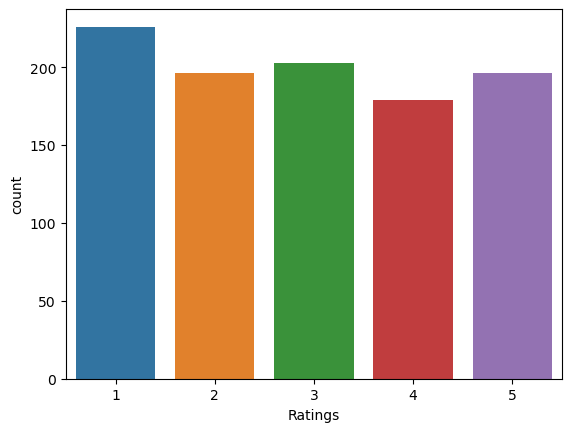

In [114]:
sns.countplot(data=data,x='Ratings')

In [157]:
data['Price'].sort_values(ascending=False).head(10).reset_index()

,index,Price
0,648,59.99
1,617,59.98
2,860,59.95
3,560,59.92
4,366,59.90
5,657,59.71
6,133,59.64
7,387,59.48
8,549,59.45
9,393,59.45


In [160]:

data[(data['Ratings']==5) & (data['Price'])].sort_values(by='Price',ascending=False).head(10).reset_index()

,index,Title,Price,Ratings,Availability
0,560,The Barefoot Contessa Cookbook,59.92,5,In stock
1,812,Life Without a Recipe,59.04,5,In stock
2,637,Approval Junkie: Adventures in Caring Too Much,58.81,5,In stock
3,379,How to Speak Golf: An Illustrated Guide to Lin...,58.32,5,In stock
4,631,Digital Fortress,58.00,5,In stock
5,545,The Sound Of Love,57.84,5,In stock
6,910,Travels with Charley: In Search of America,57.82,5,In stock
7,309,El Deafo,57.62,5,In stock
8,898,H is for Hawk,57.42,5,In stock
9,100,Immunity: How Elie Metchnikoff Changed the Cou...,57.36,5,In stock


In [162]:
data[(data['Ratings']>2) & (data['Price'])].sort_values(by='Price',ascending=False).head(10).reset_index()

,index,Title,Price,Ratings,Availability
0,648,The Perfect Play (Play by Play #1),59.99,3,In stock
1,617,Last One Home (New Beginnings #1),59.98,3,In stock
2,560,The Barefoot Contessa Cookbook,59.92,5,In stock
3,366,The Diary of a Young Girl,59.90,3,In stock
4,657,The Bone Hunters (Lexy Vaughan & Steven Macaul...,59.71,3,In stock
5,387,Boar Island (Anna Pigeon #19),59.48,3,In stock
6,549,The Man Who Mistook His Wife for a Hat and Oth...,59.45,4,In stock
7,362,The Gray Rhino: How to Recognize and Act on th...,59.15,4,In stock
8,812,Life Without a Recipe,59.04,5,In stock
9,971,Listen to Me (Fusion #1),58.99,3,In stock


In [116]:
data['Price'].max()

59.99

In [117]:
data['Price'].min()

10.0

In [124]:
# books where the rating is 1 and the price is less than 40

data[(data['Ratings']==1) & (data['Price']<40)]

,Title,Price,Ratings,Availability
5,The Requiem Red,22.65,1,In stock
16,Olio,23.88,1,In stock
17,Mesaerion: The Best Science Fiction Stories 18...,37.59,1,In stock
20,In Her Wake,12.84,1,In stock
33,The Bear and the Piano,36.89,1,In stock
...,...,...,...,...
952,"Saga, Volume 1 (Saga (Collected Editions) #1)",28.48,1,In stock
955,Paradise Lost (Paradise #1),24.96,1,In stock
958,Origins (Alphas 0.5),28.99,1,In stock
968,Matilda,28.34,1,In stock


In [129]:
# books where the rating is 5 and the price is greater than 55

data[(data['Ratings']==5) & (data['Price']>55)]

,Title,Price,Ratings,Availability
100,Immunity: How Elie Metchnikoff Changed the Cou...,57.36,5,In stock
122,"A Piece of Sky, a Grain of Rice: A Memoir in F...",56.76,5,In stock
124,A Flight of Arrows (The Pathfinders #2),55.53,5,In stock
309,El Deafo,57.62,5,In stock
342,Abstract City,56.37,5,In stock
379,How to Speak Golf: An Illustrated Guide to Lin...,58.32,5,In stock
384,Eleanor & Park,56.51,5,In stock
481,Future Shock (Future Shock #1),55.65,5,In stock
545,The Sound Of Love,57.84,5,In stock
560,The Barefoot Contessa Cookbook,59.92,5,In stock
